# Sector Neutral

## Install packages

In [1]:
import sys

In [2]:
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 18.9MB 2.2MB/s eta 0:00:01  7% |██▌                             | 1.5MB 20.5MB/s eta 0:00:01    47% |███████████████▎                | 9.0MB 21.3MB/s eta 0:00:01    58% |██████████████████▊             | 11.1MB 21.9MB/s eta 0:00:01    85% |███████████████████████████▌    | 16.2MB 17.4MB/s eta 0:00:01
    100% |████████████████████████████████| 880kB 13.6MB/s ta 0:00:01    40% |█████████████                   | 358kB 19.9MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 2.7MB/s eta 0:00:01  3% |█▎                              | 471kB 19.3MB/s eta 0:00:01    12% |████                            | 1.5MB 20.4MB/s eta 0:00:01    37% |████████████                    | 4.5MB 22.1MB/s eta 0:00:01    70% |██████████████████████▌         | 8.6MB 19.1MB/s eta 0:00:01    95% |██████████████████████████████▌ | 11.6MB 21.5MB/s eta 0:00:01
    100% |████████████████████████████████| 7.3MB 8.1MB/s eta 0:00:01    36% |███████████▋           

    100% |████████████████████████████████| 3.6MB 7.9MB/s eta 0:00:01    68% |██████████████████████          | 2.4MB 17.5MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 10.0MB/s a 0:00:01
    100% |████████████████████████████████| 92kB 12.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 7.1MB/s ta 0:00:011
    100% |████████████████████████████████| 143kB 13.5MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 10.0MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 624kB 13.3MB/s ta 0:00:01
    100% |████████████████████████████████| 163kB 10.4MB/s ta 0:00:01    76% |████████████████████████▋       | 122kB 14.8MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 6.4MB/s eta 0:00:01
    100% |████████████████████████████████| 4.3MB 7.4MB/s eta 0:00:01    13% |████▌                           | 604kB 18.9MB/s eta 0:00:01    35% |███████████▍                    | 1.5MB 19.2MB/s 

    100% |████████████████████████████████| 81kB 10.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for alphalens ... done
  Stored in directory: /root/.cache/pip/wheels/77/1e/9a/223b4c94d7f564f25d94b48ca5b9c53e3034016ece3fd8c8c1
  Running setup.py bdist_wheel for cvxpy ... done
  Stored in directory: /root/.cache/pip/wheels/2b/60/0b/0c2596528665e21d698d6f84a3406c52044c7b4ca6ac737cf3
  Running setup.py bdist_wheel for pandas ... done
  Stored in directory: /root/.cache/pip/wheels/a3/08/c3/8fdd52954d4b415624cff43c6dd32a22bac90306976a98f4af
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /root/.cache/pip/wheels/98/54/81/dd92d5b0858fac680cd7bdb8800eb26c001dd9f5dc8b1bc0ba
  Running setup.py bdist_wheel for zipline ... done
  Stored in directory: /root/.cache/pip/wheels/5d/20/7d/b48368c8634b1cb6cc7232833b2780a265d4217c0ad2e3d24c
  Running setup.py bdist_wheel for scs ... done
  Stored in directory: /root/.cache/pip/wheels/df/d0/79/37ea880586da03c620ca9ecd5e42adbd86

In [3]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time
import os
import quiz_helper
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## following zipline bundle documentation

http://www.zipline.io/bundles.html#ingesting-data-from-csv-files

### data bundle

In [5]:
import os
import quiz_helper
from zipline.data import bundles

In [6]:
os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '..', '..','data','module_4_quizzes_eod')
ingest_func = bundles.csvdir.csvdir_equities(['daily'], quiz_helper.EOD_BUNDLE_NAME)
bundles.register(quiz_helper.EOD_BUNDLE_NAME, ingest_func)
print('Data Registered')

Data Registered


### Build pipeline engine

In [7]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load(quiz_helper.EOD_BUNDLE_NAME)
engine = quiz_helper.build_pipeline_engine(bundle_data, trading_calendar)

### View Data¶
With the pipeline engine built, let's get the stocks at the end of the period in the universe we're using. We'll use these tickers to generate the returns data for the our risk model.

In [8]:
universe_end_date = pd.Timestamp('2016-01-05', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABC]),
 Equity(6 [ABT]),
 Equity(7 [ACN]),
 Equity(8 [ADBE]),
 Equity(9 [ADI]),
 Equity(10 [ADM]),
 Equity(11 [ADP]),
 Equity(12 [ADS]),
 Equity(13 [ADSK]),
 Equity(14 [AEE]),
 Equity(15 [AEP]),
 Equity(16 [AES]),
 Equity(17 [AET]),
 Equity(18 [AFL]),
 Equity(19 [AGN]),
 Equity(20 [AIG]),
 Equity(21 [AIV]),
 Equity(22 [AIZ]),
 Equity(23 [AJG]),
 Equity(24 [AKAM]),
 Equity(25 [ALB]),
 Equity(26 [ALGN]),
 Equity(27 [ALK]),
 Equity(28 [ALL]),
 Equity(29 [ALLE]),
 Equity(30 [ALXN]),
 Equity(31 [AMAT]),
 Equity(32 [AMD]),
 Equity(33 [AME]),
 Equity(34 [AMG]),
 Equity(35 [AMGN]),
 Equity(36 [AMP]),
 Equity(37 [AMT]),
 Equity(38 [AMZN]),
 Equity(39 [ANDV]),
 Equity(40 [ANSS]),
 Equity(41 [ANTM]),
 Equity(42 [AON]),
 Equity(43 [AOS]),
 Equity(44 [APA]),
 Equity(45 [APC]),
 Equity(46 [APD]),
 Equity(47 [APH]),
 Equity(48 [ARE]),
 Equity(49 [ARNC]),
 Equity(50 [ATVI]),
 Equity(51 [AVB]),
 Equity(

# Get Returns data

In [9]:
from zipline.data.data_portal import DataPortal

data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

## Get pricing data helper function

In [10]:
def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

## get pricing data into a dataframe

In [11]:
returns_df = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=5),
        universe_end_date)\
    .pct_change()[1:].fillna(0) #convert prices into returns

returns_df

Equity(0 [A])  Equity(1 [AAL])  Equity(2 [AAP])  \
2011-01-07 00:00:00+00:00       0.008437         0.014230         0.026702   
2011-01-10 00:00:00+00:00      -0.004174         0.006195         0.007435   
2011-01-11 00:00:00+00:00      -0.001886        -0.043644        -0.005927   
2011-01-12 00:00:00+00:00       0.017254        -0.008237         0.013387   
2011-01-13 00:00:00+00:00      -0.004559         0.000955         0.003031   
2011-01-14 00:00:00+00:00       0.003439        -0.009156         0.003022   
2011-01-18 00:00:00+00:00       0.034254        -0.062085        -0.004286   
2011-01-19 00:00:00+00:00      -0.010224        -0.008929         0.008754   
2011-01-20 00:00:00+00:00      -0.008496         0.021953        -0.004732   
2011-01-21 00:00:00+00:00       0.007873        -0.041038         0.005544   
2011-01-24 00:00:00+00:00       0.014646         0.027473        -0.001106   
2011-01-25 00:00:00+00:00      -0.006736         0.002982         0.009146   
2011-01-26 00:00:00+00:00      -0.030736         0.066133         0.003593   
2011-01-27 00:00:00+00:00       0.007721         0.023178        -0.001553   
2011-01-28 00:00:00+00:00      -0.018846        -0.080553        -0.000936   
2011-01-31 00:00:00+00:00       0.003608        -0.023615        -0.002351   
2011-02-01 00:00:00+00:00       0.011654        -0.001047        -0.009218   
2011-02-02 00:00:00+00:00       0.010112        -0.039304        -0.027477   
2011-02-03 00:00:00+00:00      -0.000289         0.007310         0.014126   
2011-02-04 00:00:00+00:00       0.005627        -0.036500         0.024014   
2011-02-07 00:00:00+00:00       0.007709         0.052046         0.008114   
2011-02-08 00:00:00+00:00       0.010854         0.016455         0.006202   
2011-02-09 00:00:00+00:00       0.004664         0.000000         0.016955   
2011-02-10 00:00:00+00:00       0.000413        -0.003048        -0.011367   
2011-02-11 00:00:00+00:00      -0.007150         0.028364         0.000764   
2011-02-14 00:00:00+00:00       0.001663        -0.015790        -0.023274   
2011-02-15 00:00:00+00:00      -0.011905         0.011043        -0.003926   
2011-02-16 00:00:00+00:00       0.015123         0.001958         0.013860   
2011-02-17 00:00:00+00:00      -0.003311        -0.017791        -0.024844   
2011-02-18 00:00:00+00:00       0.011078        -0.020103        -0.006693   
...                                  ...              ...              ...   
2015-11-20 00:00:00+00:00       0.001072        -0.002373         0.002767   
2015-11-23 00:00:00+00:00      -0.007094         0.002379        -0.001228   
2015-11-24 00:00:00+00:00       0.002085        -0.025309         0.003504   
2015-11-25 00:00:00+00:00      -0.008206         0.001938         0.006805   
2015-11-27 00:00:00+00:00      -0.003256         0.009201         0.003285   
2015-11-30 00:00:00+00:00      -0.010209        -0.010321        -0.012798   
2015-12-01 00:00:00+00:00       0.015748         0.048493        -0.002396   
2015-12-02 00:00:00+00:00      -0.005284         0.012930        -0.027166   
2015-12-03 00:00:00+00:00      -0.009521        -0.012555        -0.019944   
2015-12-04 00:00:00+00:00       0.020199         0.039303         0.006779   
2015-12-07 00:00:00+00:00      -0.000340         0.018020        -0.029578   
2015-12-08 00:00:00+00:00      -0.023307        -0.026876        -0.008866   
2015-12-09 00:00:00+00:00      -0.005170        -0.020213         0.022223   
2015-12-10 00:00:00+00:00       0.015039         0.010092        -0.009466   
2015-12-11 00:00:00+00:00      -0.012227        -0.045356        -0.019179   
2015-12-14 00:00:00+00:00      -0.011197        -0.007618        -0.008325   
2015-12-15 00:00:00+00:00       0.024683         0.019768         0.057990   
2015-12-16 00:00:00+00:00       0.010780         0.014190         0.029771   
2015-12-17 00:00:00+00:00      -0.017212        -0.017122        -0.048190   
2015-12-18 00:00:00+00:00      -0.041084        -

## Sector data helper function
We'll create an object for you, which defines a sector for each stock.  The sectors are represented by integers.  We inherit from the Classifier class.  [Documentation for Classifier](https://www.quantopian.com/posts/pipeline-classifiers-are-here), and the [source code for Classifier](https://github.com/quantopian/zipline/blob/master/zipline/pipeline/classifiers/classifier.py)

In [12]:
from zipline.pipeline.classifiers import Classifier
from zipline.utils.numpy_utils import int64_dtype
class Sector(Classifier):
    dtype = int64_dtype
    window_length = 0
    inputs = ()
    missing_value = -1

    def __init__(self):
        self.data = np.load('../../data/project_4_sector/data.npy')

    def _compute(self, arrays, dates, assets, mask):
        return np.where(
            mask,
            self.data[assets],
            self.missing_value,
        )

In [13]:
sector = Sector()
sector

Sector((), window_length=0)

In [14]:
len(sector.data)

491

In [18]:
np.unique(sector.data)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Quiz 1
How many unique sectors are in the sector variable?

## Answer 1 here
11, -1 represents missing value.

## Create an alpha factor based on momentum

We want to calculate the one-year return.  
In other words, get the close price of today, minus the close price of 252 trading days ago, and divide by that price from 252 days ago.

$1YearReturn_t = \frac{price_{t} - price_{t-252}}{price_{t-252}}$

In [19]:
from zipline.pipeline.factors import Returns

In [20]:
#Returns

zipline.pipeline.factors.basic.Returns

## We'll use 2 years of data to calculate the factor

**Note:** Going back 2 years falls on a day when the market is closed. Pipeline package doesn't handle start or end dates that don't fall on days when the market is open. To fix this, we went back 2 extra days to fall on the next day when the market is open.

In [21]:
factor_start_date = universe_end_date - pd.DateOffset(years=2, days=2)
factor_start_date

Timestamp('2014-01-03 00:00:00+0000', tz='UTC')

In [22]:
## 1 year returns can be the basis for an alpha factor
p1 = Pipeline(screen=universe)
rets1 = Returns(window_length=252, mask=universe)
p1.add(rets1,"1YearReturns")
df1 = engine.run_pipeline(p1, factor_start_date, universe_end_date)

In [23]:
#graphviz lets us visualize the pipeline
import graphviz

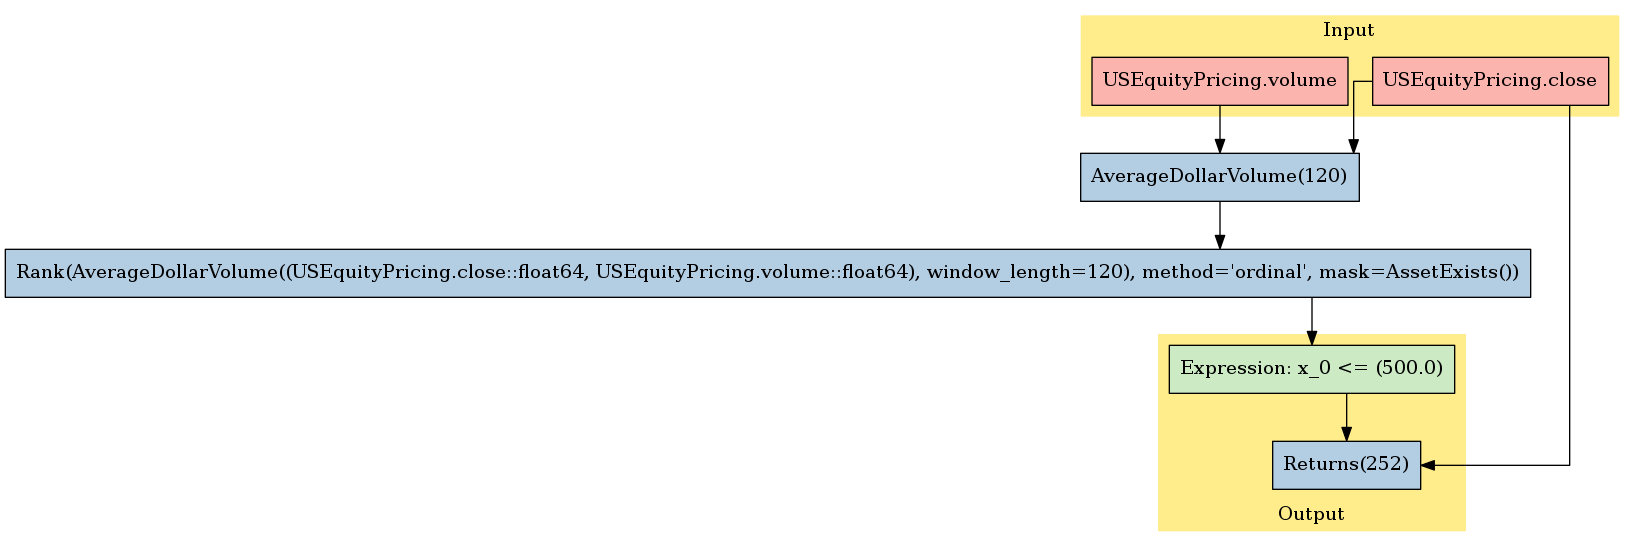

In [24]:
p1.show_graph(format='png')

## View the data of the factor

In [27]:
df1.head(10)

1YearReturns
2014-01-03 00:00:00+00:00 Equity(0 [A])         0.799433
                          Equity(1 [AAL])       0.856600
                          Equity(2 [AAP])       0.518050
                          Equity(3 [AAPL])      0.045903
                          Equity(4 [ABBV])      0.551403
                          Equity(5 [ABC])       0.641428
                          Equity(6 [ABT])       0.167680
                          Equity(7 [ACN])       0.207205
                          Equity(8 [ADBE])      0.570596
                          Equity(9 [ADI])       0.172068

## Explore the demean function

The Returns class inherits from zipline.pipeline.factors.factor.  
[The documentation for demean is located here](https://www.zipline.io/appendix.html#zipline.pipeline.factors.Factor.demean), and is also pasted below:

```
demean(mask=sentinel('NotSpecified'), groupby=sentinel('NotSpecified'))[source]
Construct a Factor that computes self and subtracts the mean from row of the result.

If mask is supplied, ignore values where mask returns False when computing row means, and output NaN anywhere the mask is False.

If groupby is supplied, compute by partitioning each row based on the values produced by groupby, de-meaning the partitioned arrays, and stitching the sub-results back together.

Parameters:	
mask (zipline.pipeline.Filter, optional) – A Filter defining values to ignore when computing means.
groupby (zipline.pipeline.Classifier, optional) – A classifier defining partitions over which to compute means.
```

## Quiz 2

By looking at the documentation, and then the source code for `demean`, what are two parameters for this function?  Which one or ones would you call if you wanted to demean by sector and wish to demean for all values in the chosen universe?

[The source code](https://www.zipline.io/_modules/zipline/pipeline/factors/factor.html#Factor.demean) has useful comments to help you answer this question.

## Answer 2 here
I would use the groupby, passing it the sectors. 


## Quiz 3
Turn 1 year returns into an alpha factor

We can do some processing to convert our signal (1 year return) into an alpha factor. One step is to demean by sector.

* demean
For each stock, we want to take the average return of stocks that are in the same sector, and then remove this from the return of each individual stock.

## Answer 3

In [38]:
#TODO
# create a pipeline called p2
p2 = Pipeline(screen=universe)
# create a factor of one year returns, deman by sector
rets_deman_by_sector = Returns(window_length=252, mask=universe).demean(groupby=Sector())

# add the factor to the p2 pipeline
p2.add(rets_deman_by_sector,"DemeanBySector")

## visualize the second pipeline

In [39]:
p2.show_graph(format='png')

## Quiz 4
How does this pipeline compare with the first pipeline that we created earlier?

## Answer 4 here


## run pipeline and view the factor data

In [ ]:
df2 = engine.run_pipeline(p2, factor_start_date, universe_end_date)

In [ ]:
df2.head()

## Solution
[Solution notebook](sector_neutral_solution.ipynb)